In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import joblib
import matplotlib.pyplot as plt

In [26]:
df = pd.read_csv('../datasets/Mall_Customers.csv')

In [27]:
# Map genders to numbers
gender_map = {'Male': 0, 'Female': 1}
pd.set_option('future.no_silent_downcasting', True)
df['Gender'] = df['Gender'].replace(gender_map)

In [28]:
# Define spending categories based on score thresholds
def categorize_spending(score):
    if score < 33:
        return 1
    elif score <= 66:
        return 2
    else:
        return 3

In [29]:
# Apply the categorization function to create a new column 'Spending Category'
df['Spending Category'] = df['Spending Score (1-100)'].apply(categorize_spending)
df.drop(columns=['CustomerID'], inplace=True)
df.drop(columns=['Spending Score (1-100)'], inplace=True)

Classification Report:
              precision    recall  f1-score   support

           1       0.83      0.38      0.53        13
           2       0.72      0.90      0.80        20
           3       0.56      0.71      0.62         7

    accuracy                           0.70        40
   macro avg       0.70      0.67      0.65        40
weighted avg       0.73      0.70      0.68        40



Text(0.5, 1.0, 'Decision Tree Confusion Matrix')

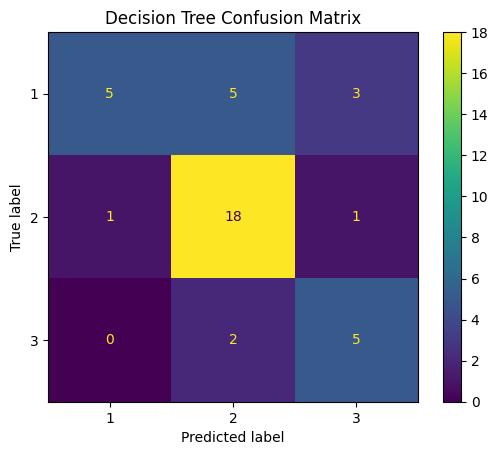

In [30]:
### Decision ###
data = df.copy()
X = data.drop(columns=['Spending Category'])
y = data['Spending Category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(random_state=42)

clf.fit(X_train, y_train)
joblib.dump(clf, '../models/decision.pkl')

y_pred = clf.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm,display_labels=clf.classes_).plot()
plt.grid(False)
plt.title('Decision Tree Confusion Matrix')